In [1]:
#Reading the Data
import json
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

In [2]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('All_Beauty.json.gz')

In [3]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4.0,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN
2,4.0,True,"08 10, 2014",A1572GUYS7DGSR,0143026860,David G,"This book was very informative, covering all a...",Worth the Read,1407628800,NaN,NaN,NaN
3,5.0,True,"03 11, 2013",A1PSGLFK1NSVO,0143026860,TamB,I am already a baseball fan and knew a bit abo...,Good Read,1362960000,NaN,NaN,NaN
4,5.0,True,"12 25, 2011",A6IKXKZMTKGSC,0143026860,shoecanary,This was a good story of the Black leagues. I ...,"More than facts, a good story read!",1324771200,5,NaN,NaN


In [4]:
#use the data of 2018
df['year'] = df['reviewTime'].apply(lambda x: x.split(', ')[1])
df = df[(df['year'] == '2018')]

In [5]:
df = df[df['asin'] == 'B000FOI48G']

In [6]:
import sys
import numpy as np
import pandas as pd
import nltk
from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer 
from sklearn.decomposition import LatentDirichletAllocation #package for LDA

from pprint import pprint
import pyLDAvis
import pyLDAvis.sklearn


import matplotlib.pyplot as plt
%matplotlib inline

#define text normalization function
%run ./Text_Normalization_Function.ipynb #defining text normalization function

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

distutils: c:\users\willi\appdata\local\programs\python\python38\Include\UNKNOWN
sysconfig: c:\users\willi\appdata\local\programs\python\python38\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\willi\appdata\local\programs\python\python38\Include\UNKNOWN
sysconfig: c:\users\willi\appdata\local\programs\python\python38\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\willi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


distutils: c:\users\willi\appdata\local\programs\python\python38\Include\UNKNOWN
sysconfig: c:\users\willi\appdata\local\programs\python\python38\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\willi\appdata\local\programs\python\python38\Include\UNKNOWN
sysconfig: c:\users\willi\appdata\local\programs\python\python38\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\willi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
distutils: c:\users\willi\appdata\local\programs\python\python38\Include\UNKNOWN
sysconfig: c:\users\willi\appdata\local\programs\python\python38\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\willi\appdata\local\programs\python\python38\Include\UNKNOWN
sysconfig: c:\users\willi\appdata\local\programs\python\python38\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the

Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Willi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Willi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), ('<', 'n'), ('/p', 'n'), ('>', 'n')]
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  < p > the circus dog in a plissé skirt jump over python who be n't that large , just 3 foot long. < /p >
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:    p   The circus dog in a plissé skirt jumped over Python who was n t that large   just 3 feet long     p  
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  < p > The circus dog pliss

In [7]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [8]:
df['trigger'] = df['reviewText'].apply(lambda x: isinstance(x,str))
df['trigger'].replace(False,np.nan,inplace=True)
df.dropna(subset=['trigger'],inplace=True)

In [9]:
## nomalization, no need to run
reviews = df['reviewText'].apply(lambda x: x).tolist()
normalized_reviews = normalize_corpus(reviews) 

In [10]:
## save normalized_reviews(no need to run)
import pickle
file=open("reviews.pickle","wb")
pickle.dump(normalized_reviews,file) #保存list到文件
file.close()



In [11]:
## load nomalized_reviews and do vectorization
import pickle
file=open("reviews.pickle","rb")
normalized_reviews = pickle.load(file)

#define a Bag-of-Words vecgtorizer
bow_vectorizer_news = CountVectorizer(max_features=3000)

#vectorize data
bow_news_corpus = bow_vectorizer_news.fit_transform(normalized_reviews)



In [12]:
## topic modeling(no need to runb)
loglikescore = []
perpexityscore = []

# for i in range(1,20):
i = 9
#fit the topic model with 5 topic(1-5 rating)
lda_news = LatentDirichletAllocation(n_components=i, max_iter=100,
                                     doc_topic_prior = 1/i,
                                     topic_word_prior = 1/i,random_state = 1).fit(bow_news_corpus)
loglikescore.append(lda_news.score(bow_news_corpus))
perpexityscore.append(lda_news.perplexity(bow_news_corpus))

#Log-Likelihood (add code):
print("Log-Likelihood (higher values are better): ", loglikescore[-1])

#Perplexity score (add code):
print("Perplexity (lower values are better): ", perpexityscore[-1])

Log-Likelihood (higher values are better):  -6115.183491072333
Perplexity (lower values are better):  664.2117152624243


In [13]:
no_top_words_news = 10
display_topics(lda_news, bow_vectorizer_news.get_feature_names(), no_top_words_news)

Topic 0:
good product like job great work reservoir clean well replacement
Topic 1:
year loud motor brand review mine long tube work sink
Topic 2:
work great water teeth use food floss little well flosser
Topic 3:
water use flosser stop since recommend several like work leak
Topic 4:
send last like year water machine call flosser love month
Topic 5:
something floss good waterpik part still add mouth least wear
Topic 6:
product well work year use good clean dentist pressure twice
Topic 7:
work good easy machine new rubber use expect leak great
Topic 8:
gum use buy pocket teeth toothpaste good need work model


In [14]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      111.092506 -133.722946       1        1  19.523759
4       34.946613  107.064590       2        1  14.171291
0      -28.088213 -159.949036       3        1  13.435511
6      147.698074   21.369604       4        1  11.716754
3      -97.501183  126.981384       5        1  11.705028
7       30.312096  -32.794945       6        1   8.577461
1     -155.443665 -118.494690       7        1   8.029056
8     -204.248108   22.596130       8        1   7.152122
5      -79.404678   -6.864717       9        1   5.689019, topic_info=         Term       Freq      Total Category  logprob  loglift
309   product   8.000000   8.000000  Default  30.0000  30.0000
225      like  10.000000  10.000000  Default  29.0000  29.0000
173      good  13.000000  13.000000  Default  28.0000  28.0000
178       gum   5.000000   5.000000  Default  27.0000  27.0000
458      year  10.000000  10.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
4         add   0.570731   1.846691   Topic9  -4.5411   1.6924
249     mouth   0.570729   1.780184   Topic9  -4.5412   1.7291
221     least   0.570728   1.890528   Topic9  -4.5412   1.6689
446      wear   0.570728   1.857065   Topic9  -4.5412   1.6868
79   complete   0.570727   1.857065   Topic9  -4.5412   1.6868

[490 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         4  0.750166         60s
1         6  0.785423    absolute
2         9  0.856869  accidently
3         1  0.703395    actually
4         4  0.541509         add
...     ...       ...         ...
458       4  0.189530        year
458       6  0.094765        year
458       7  0.284295        year
458       9  0.094765        year
459       8  0.804767         yes

[606 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 7, 4, 8, 2, 9, 6])

In [15]:
## save lda_news(no need to run)
import pickle
file=open("lda_news_9.pickle","wb")
pickle.dump(lda_news,file) #保存list到文件
file.close()


In [16]:
#load lda_news(9 topic)
import pickle
file=open("lda_news_9.pickle","rb")
lda_news = pickle.load(file)

#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda_news, bow_news_corpus, bow_vectorizer_news, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      111.092506 -133.722946       1        1  19.523759
4       34.946613  107.064590       2        1  14.171291
0      -28.088213 -159.949036       3        1  13.435511
6      147.698074   21.369604       4        1  11.716754
3      -97.501183  126.981384       5        1  11.705028
7       30.312096  -32.794945       6        1   8.577461
1     -155.443665 -118.494690       7        1   8.029056
8     -204.248108   22.596130       8        1   7.152122
5      -79.404678   -6.864717       9        1   5.689019, topic_info=         Term       Freq      Total Category  logprob  loglift
309   product   8.000000   8.000000  Default  30.0000  30.0000
225      like  10.000000  10.000000  Default  29.0000  29.0000
173      good  13.000000  13.000000  Default  28.0000  28.0000
178       gum   5.000000   5.000000  Default  27.0000  27.0000
458      year  10.000000  10.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
4         add   0.570731   1.846691   Topic9  -4.5411   1.6924
249     mouth   0.570729   1.780184   Topic9  -4.5412   1.7291
221     least   0.570728   1.890528   Topic9  -4.5412   1.6689
446      wear   0.570728   1.857065   Topic9  -4.5412   1.6868
79   complete   0.570727   1.857065   Topic9  -4.5412   1.6868

[490 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         4  0.750166         60s
1         6  0.785423    absolute
2         9  0.856869  accidently
3         1  0.703395    actually
4         4  0.541509         add
...     ...       ...         ...
458       4  0.189530        year
458       6  0.094765        year
458       7  0.284295        year
458       9  0.094765        year
459       8  0.804767         yes

[606 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 7, 4, 8, 2, 9, 6])

<AxesSubplot:xlabel='overall'>

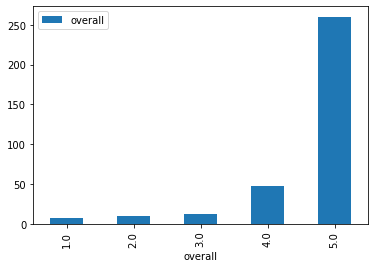

In [17]:
#rating distribution
df.loc[:,['overall']].groupby(df.overall).sum().plot(kind='bar')